# 05 King County House Sales - Unsupervised Machine Learning - Clustering with Kmeans

### This notebook contains:
    01. Importing Libraries
    02. Importing Data
    03. Data Preparation
        A. Dropping Categorical Columns
        B. Standardization of Data
        C. Elbow Technique
    04. Kmeans Clustering
    05. Visualizations
    06. Descriptive Statistics
    07. Evaluation of Results
    08. Exporting Data

## 01. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import plotly.express as px

In [3]:
# command for matplotlib visuals to appear in the notebook 
%matplotlib inline

## 02. Importing Data

In [4]:
# turning project folder path into string
path = r'/Users/lisa/DA Projects/01-2023 King County House Sales'

In [5]:
# importing house sale data
dfhs = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'kc_house_data_price-cats.csv'), index_col = False)

In [6]:
# check
dfhs.head()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low price
1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,medium price
2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low price
3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,medium price
4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,medium price


In [7]:
# dropping index columns
dfhs = dfhs.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [8]:
#check
dfhs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low price
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,medium price
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low price
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,medium price
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,medium price


In [9]:
dfhs.shape

(21596, 22)

In [10]:
dfhs.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_category'],
      dtype='object')

## 03. Data Preparation

### A. Dropping Categorical Columns

In [11]:
# dropping categorical columns
dfhs = dfhs.drop(columns=['id', 'date','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'zipcode','price_category'])

In [12]:
#check
dfhs.head()

,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,1180,5650,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,2570,7242,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,770,10000,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,1960,5000,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,1680,8080,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### B. Standardization of Data

In [13]:
# using standard scaler to standardize dataframe
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(dfhs)

In [14]:
# fitting standardized data
pca = PCA()
pca.fit(dfhs)

PCA()

In [15]:
# checking variance for all attributes
pca.explained_variance_ratio_

array([9.82213719e-01, 1.57062673e-02, 2.06932433e-03, 6.47394261e-06,
       1.92174598e-06, 1.21673108e-06, 1.07268645e-06, 4.44452093e-09,
       2.82745063e-12, 1.16352658e-13, 9.87783393e-14, 6.38255160e-37])

Text(0, 0.5, 'Cumulative Explained Variance')

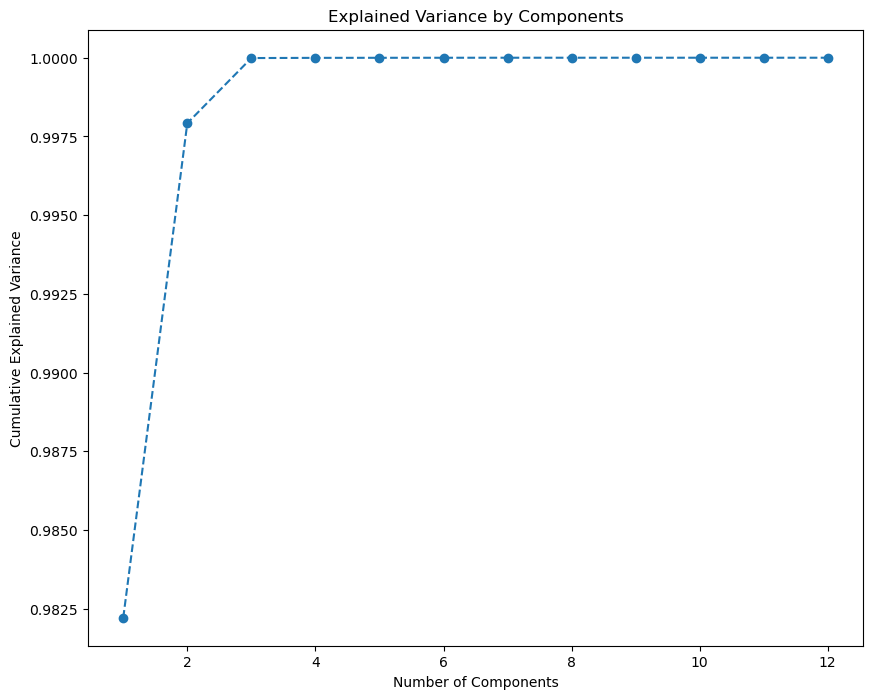

In [16]:
# plotting variance
plt.figure(figsize = (10,8))
plt.plot(range(1,13),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [17]:
# choosing 2 components as they preserve around 90% of variance according to the graph
pca = PCA(n_components = 2)

In [18]:
# fitting model to data with selected number of components
pca.fit(segmentation_std)

PCA(n_components=2)

In [19]:
# creating array from calculated results
pca.transform(segmentation_std)

array([[-2.03158113,  0.3507212 ],
       [-0.20066833, -2.00911964],
       [-2.05512269, -0.21732234],
       ...,
       [-1.8675834 ,  0.32748953],
       [-0.44119061,  0.95958296],
       [-1.95474551,  0.37176404]])

In [20]:
scores_pca = pca.transform(segmentation_std)

### C. Elbow Technique (using pca data)

In [21]:
# fitting kmeans using transformed pca data
wcss = []
for i in range(1,10):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

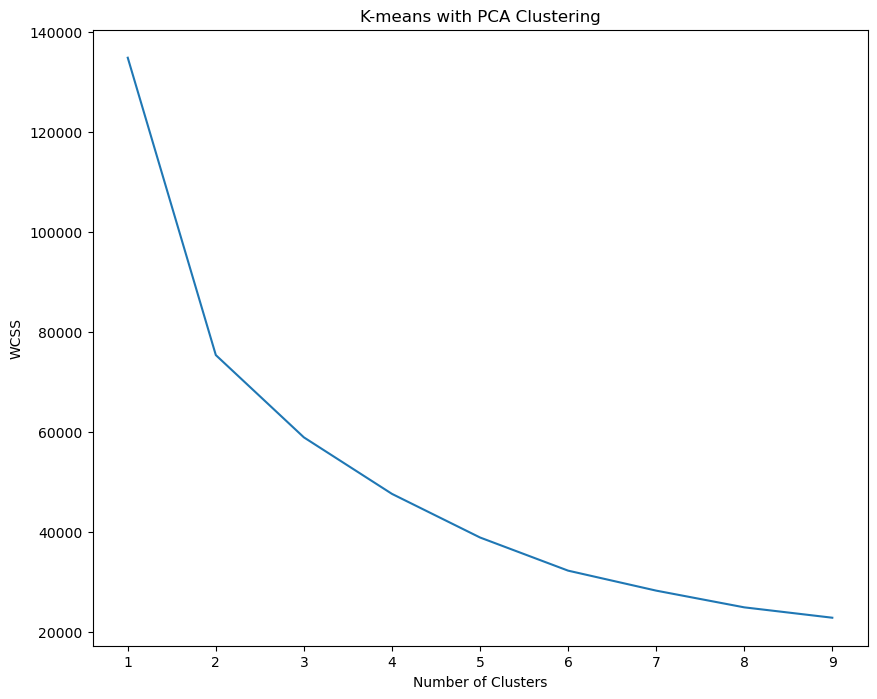

In [22]:
# plotting wcss per number of clusters
pl.figure(figsize = (10,8))
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

I decided to use 3 clusters. There a 3 more noticeable 'kinks' in the elbow. One at 2 clusters, one at 3 and one at 6 clusters. I considered 2 clusters as too few and wanted to add more granularity, but 6 clusters appear as too many for the size of the data set. I choose a number of clusters somewhat in between = 3. 

## 04. Kmeans Clustering

In [23]:
# creating kmeans object with 3 clusters
kmeans_pca = KMeans(n_clusters = 3)

In [24]:
# fitting k-means object to data
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3)

In [25]:
df_pca_kmeans = pd.concat([dfhs.reset_index(drop=True),pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [26]:
df_pca_kmeans.head()

,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,Component 1,Component 2,Component 3,Segment K-Means PCA
0,221900.0,1180,5650,7,1180,0,1955,0,47.5112,-122.257,1340,5650,-2.031581,0.350721,1
1,538000.0,2570,7242,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,-0.200668,-2.009120,1
2,180000.0,770,10000,6,770,0,1933,0,47.7379,-122.233,2720,8062,-2.055123,-0.217322,1
3,604000.0,1960,5000,7,1050,910,1965,0,47.5208,-122.393,1360,5000,-1.200669,-1.139794,1
4,510000.0,1680,8080,8,1680,0,1987,0,47.6168,-122.045,1800,7503,-0.039675,0.680602,0


In [27]:
# Create a new Segment column for easier cluster readabilty
df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-Means PCA'].map({0: 'first', 
                                                                    1: 'second', 
                                                                    2: 'third'})

In [28]:
df_pca_kmeans.head()

,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,Component 1,Component 2,Component 3,Segment K-Means PCA,Segment
0,221900.0,1180,5650,7,1180,0,1955,0,47.5112,-122.257,1340,5650,-2.031581,0.350721,1,second
1,538000.0,2570,7242,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,-0.200668,-2.009120,1,second
2,180000.0,770,10000,6,770,0,1933,0,47.7379,-122.233,2720,8062,-2.055123,-0.217322,1,second
3,604000.0,1960,5000,7,1050,910,1965,0,47.5208,-122.393,1360,5000,-1.200669,-1.139794,1,second
4,510000.0,1680,8080,8,1680,0,1987,0,47.6168,-122.045,1800,7503,-0.039675,0.680602,0,first


In [29]:
# frequency check
df_pca_kmeans['Segment'].value_counts()

second    12568
first      6170
third      2858
Name: Segment, dtype: int64

## 05. Visualizations

### Price & sqft_living

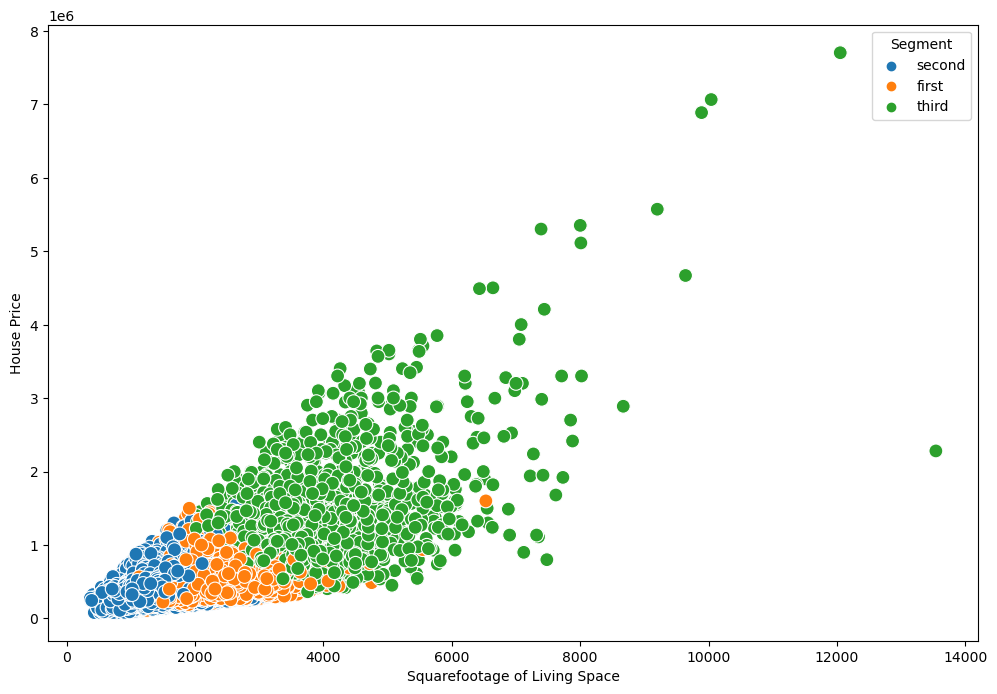

In [30]:
# plot cluster price-sqft_living
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['sqft_living'], y=df_pca_kmeans['price'], hue=df_pca_kmeans['Segment'], s=100) 
ax.grid(False)
plt.xlabel('Squarefootage of Living Space')
plt.ylabel('House Price')
plt.savefig('cluster_price-sqft_living.png', bbox_inches='tight', dpi=400)
plt.show()

The first cluster (orange) gathers data points with a price under 1,5 mio dollars (there seem to be some outliers nestled into the second cluster (green)) and a living space of (approx.) 2000 to 4000 squarefoot. 
The second cluster seems to be densely populated but the data points are more scattered. It gathers the data points with a living space of over 2000 squarefoot and a price over (approx.) 300k. 
The third cluster (blue) seems to be the most populated one. It encompasses data points with a house price under 1 mio dollars and a living space approximately under 2000 squarefoot. 
In previous steps of the analysis we looked at the geographical location of the houses (via zipcode). Considering that houses in more rural areas often have more living space, I think the cluster depict different locations. The third cluster could be houses in more densely populated areas but other factors dictate the comparatively (to other clusters) lower price. The first cluster (orange), I image, could be interpreted as the outskirts of cities, where living space is still limited, but bigger. The second cluster (green) would be houses in rural areas with big living space. But I assume that other factors influence the price, such as condition of the house etc. 

### Price & Sqft_lot

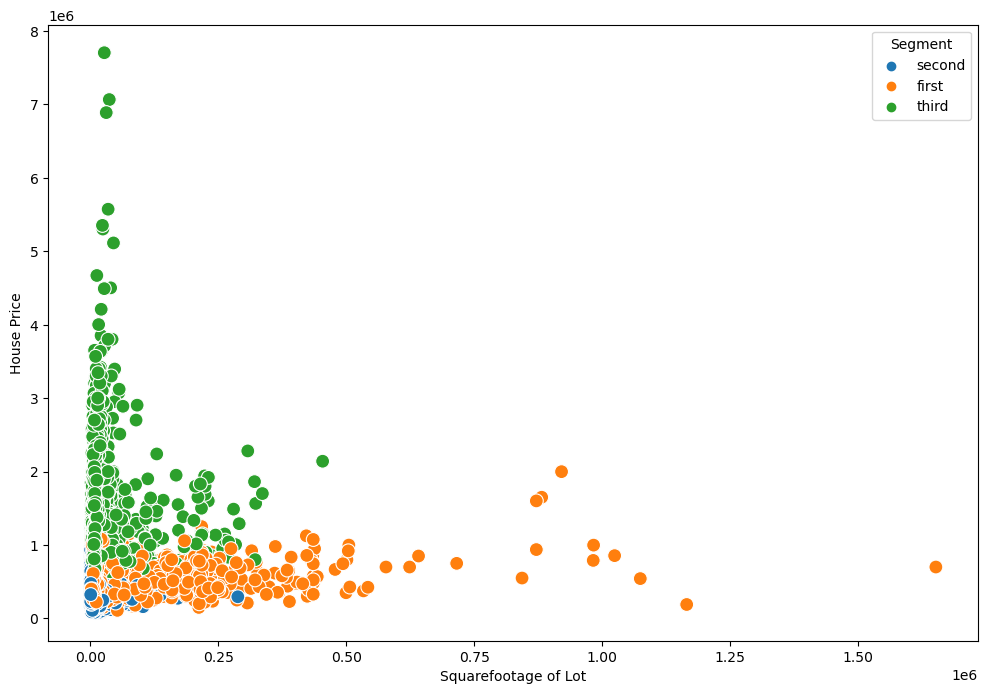

In [31]:
# plot cluster price-sqft_lot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['sqft_lot'], y=df_pca_kmeans['price'], hue=df_pca_kmeans['Segment'], s=100) 
ax.grid(False)
plt.xlabel('Squarefootage of Lot')
plt.ylabel('House Price')
plt.savefig('cluster_price-sqft_lot.png', bbox_inches='tight', dpi=400)
plt.show()

The first cluster (orange) gathers data points with houses under 1 mio dollars and contains data points that habe the biggest lots. It is densely populated in the area under 0.5 squarefootage (5000 sqft). 
The second cluster (green) contains data points with the highest prices (over 1 mio to max scale) and is clustered around the area of none to minimal lot size.
The third cluster (blue) contains of data points under 1 mio dollars and a lot size under 3000 squarefoot.
Looking at the chart, it seems that the second cluster are houses in densely populated areas with zero to minimal lots. But the price is high because of its location. The first cluster (orange) could be more rural houses with large lots which leaves the third cluster (blue). Which I would interpret as either houses/apartments in a city where its comparatively lower price is dictated by other factors, or, houses in the outskirts of cities with small lots.

### Price & Year Built

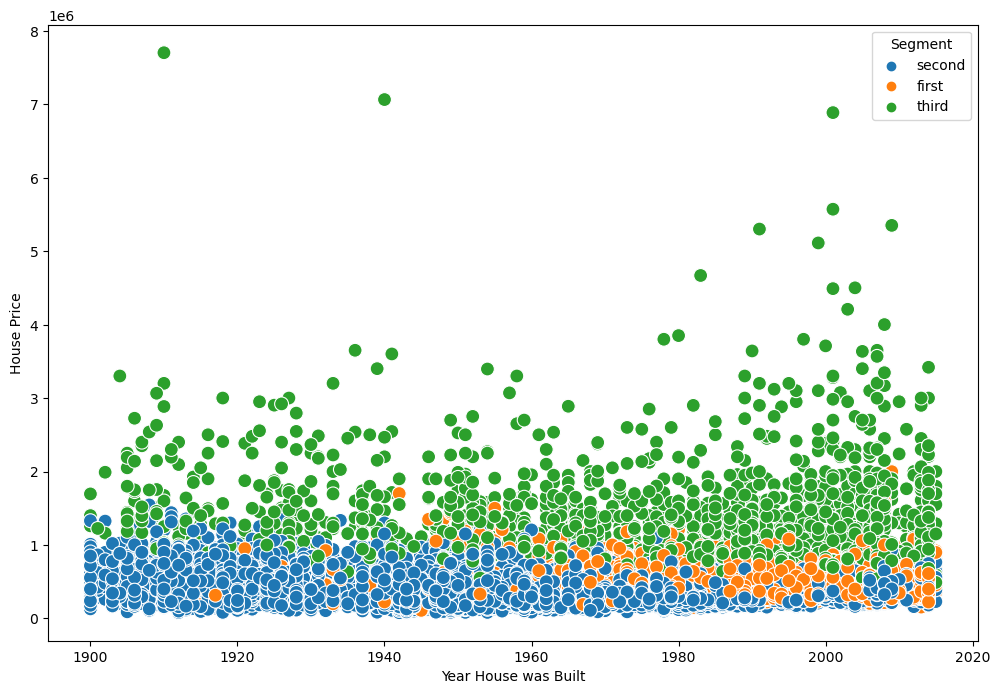

In [32]:
# plot cluster price-year built
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['yr_built'], y=df_pca_kmeans['price'], hue=df_pca_kmeans['Segment'], s=100) 
ax.grid(False)
plt.xlabel('Year House was Built')
plt.ylabel('House Price')
plt.savefig('cluster_price-yr_built.png', bbox_inches='tight', dpi=400)
plt.show()

The first cluster (orange) is densely populated with houses built after 1960 but still has some built before (after approximately 1920). The data points seem to populate an area under 2 mio dollars. 
The second cluster (green) has houses built over the whole scale but the data points seem more clustered from 1960 on as well. This cluster contains the highest priced houses (highest being built before 1920).
The third cluster (blue)  gathers data points under 1.5 mio dollars and contains houses built during all years of the scale but seems more densely populated before 1980 (before 1940 seeming to be the most populated). The data points are houses under 1.5 mio dollars as well. This cluster has the most data points.
Looking at the graph I would assume that, generally, newer houses are a bit more expensive, but I would assume that other facotrs, such as condition of the house, also influences the price. Old houses that are extremely high priced could be properties such as old manor houses or historical buildings that probably are in good conditions. 

## 06. Descriptive Statistics

In [33]:
df_pca_kmeans.columns

Index(['price', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'Component 1', 'Component 2', 'Component 3',
       'Segment K-Means PCA', 'Segment'],
      dtype='object')

In [34]:
df_pca_kmeans.groupby('Segment').agg({'price':['mean', 'median'], 
                                    'sqft_living':['mean', 'median'], 
                                    'sqft_lot':['mean', 'median'],
                                    'yr_built':['mean', 'median']})

price            sqft_living              sqft_lot           \
                 mean    median         mean  median          mean   median   
Segment                                                                       
first    5.077632e+05  487550.0  2346.505673  2330.0  27998.589627   8685.0   
second   4.157631e+05  385000.0  1584.194860  1530.0   7590.308800   7015.0   
third    1.157422e+06  970000.0  3687.540238  3500.0  20276.288314  10689.5   

            yr_built          
                mean  median  
Segment                       
first    1990.394327  1993.0  
second   1958.307288  1958.0  
third    1984.952414  1993.0

## 07. Evaluation of Results

Considering the results of previous analysis steps as well as the ones from this clustering, I think, that it makes sense to separate houses into 3 categories: 
- Houses in rural areas
- Houses in city outskirts
- Houses in cities/desely populated area

A reason for that is, that the clusters indicate this categorization but the price seems to be dictated by additional factors and is formulated differently for each area. For example, a house in a densely populated area most of the time does not have a lot of any size as space in cities is expensive, but the access to normal city related ameneties dictates a higher price. We looked at the geographical distribution of house prices before and established that house prices around the Seattle bay area are especially high. Houses from that area would fall into the category.

A future step for this analysis could be to calculate the average cost per squarefoot for each zipcode area and map the results to identify regions with high/low costs and to better predict the developing house prices, as well as look at areas and house listings and try to decipher how the price is composed. This would include looking at the categorical variables.

## 08. Exporting Data

In [35]:
# Exporting data with cluster information
df_pca_kmeans.to_csv(os.path.join(path, '02 Data','Prepared Data', 'kc_house_data_clustered_kmeans.csv'))